In [1]:
import google.colab
import tarfile

In [2]:
import pprint

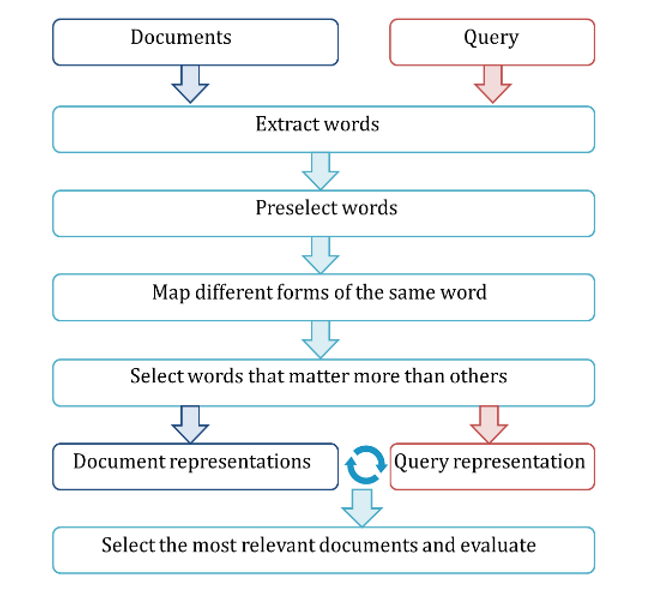

In [3]:
uploader = google.colab.files.upload()

Saving cisi.tar.gz to cisi.tar.gz


[DataSet](https://ir.dcs.gla.ac.uk/resources/test_collections/cisi/)

In [4]:
file_name = list(uploader.keys())[0]

with tarfile.open(file_name, "r:") as tar:
        tar.extractall("extracted_data")
        print("Extraction complete!")

Extraction complete!


In [5]:
file_path = "/content/extracted_data/CISI.ALL"

try:
    with open(file_path, "r") as f:
        content = f.read()
        print(content[:500])
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

.I 1
.T
18 Editions of the Dewey Decimal Classifications
.A
Comaromi, J.P.
.W
   The present study is a history of the DEWEY Decimal
Classification.  The first edition of the DDC was published
in 1876, the eighteenth edition in 1971, and future editions
will continue to appear as needed.  In spite of the DDC's
long and healthy life, however, its full story has never
been told.  There have been biographies of Dewey
that briefly describe his system, but this is the first
attempt to provide a detai


In [6]:
def read_documents():

  f = open("/content/extracted_data/CISI.ALL")

  merged = ""

  for a_line in f.readlines():
    if a_line.startswith("."):
      merged += "\n" + a_line.strip()
    else:
      merged += " " + a_line.strip()

  documents = {}

  content = ""
  doc_id = ""

  for a_line in merged.split("\n"):
    if a_line.startswith(".I"):
      doc_id = a_line.split(" ")[1].strip()
    elif a_line.startswith(".X"):
      documents[doc_id] = content
      content = ""
      doc_id = ""
    else:
      content += a_line.strip()[3:] + " "

  f.close()
  return documents

documents = read_documents()
print(len(documents))
print(documents.get("1")) #H

1460
 18 Editions of the Dewey Decimal Classifications Comaromi, J.P. The present study is a history of the DEWEY Decimal Classification.  The first edition of the DDC was published in 1876, the eighteenth edition in 1971, and future editions will continue to appear as needed.  In spite of the DDC's long and healthy life, however, its full story has never been told.  There have been biographies of Dewey that briefly describe his system, but this is the first attempt to provide a detailed history of the work that more than any other has spurred the growth of librarianship in this country and abroad. 


In [7]:
file_path = "/content/extracted_data/CISI.QRY"

try:
    with open(file_path, "r") as f:
        content = f.read()
        print(content[:500])
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

.I 1
.W
What problems and concerns are there in making up descriptive titles?
What difficulties are involved in automatically retrieving articles from
approximate titles?
What is the usual relevance of the content of articles to their titles?
.I 2
.W
How can actually pertinent data, as opposed to references or entire articles
themselves, be retrieved automatically in response to information requests?
.I 3
.W
What is information science?  Give definitions where possible.
.I 4
.W
Image recognition


In [8]:
def read_queries():
  f = open("/content/extracted_data/CISI.QRY")

  merged = ""

  for a_line in f.readlines():
    if a_line.startswith("."):
      merged += "\n" + a_line.strip()
    else:
      merged += " " + a_line.strip()

  queries = {}

  content = ""
  qry_id = ""

  for a_line in merged.split("\n"):
    if a_line.startswith(".I"):
      if not content=="":
        queries[qry_id] = content
        content = ""
        qry_id = ""
      qry_id = a_line.split(" ")[1].strip()
    elif a_line.startswith(".W") or a_line.startswith(".T"):
      content += a_line.strip()[3:] + " "

  queries[qry_id] = content
  f.close()
  return queries

queries = read_queries()
print(len(queries))
print(queries.get("1"))

112
What problems and concerns are there in making up descriptive titles? What difficulties are involved in automatically retrieving articles from approximate titles? What is the usual relevance of the content of articles to their titles? 


In [9]:
file_path = "/content/extracted_data/CISI.REL"

try:
    with open(file_path, "r") as f:
        content = f.read()
        print(content[:100])
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


     1     28	0	0.000000
     1     35	0	0.000000
     1     38	0	0.000000
     1     42	0	0.000000



In [10]:
def read_mappings():

  f = open("/content/extracted_data/CISI.REL")

  mappings = {}

  for a_line in f.readlines():

    voc = a_line.strip().split()
    key = voc[0].strip()
    current_value = voc[1].strip()
    value = []

    if key in mappings.keys():
      value = mappings.get(key)

    value.append(current_value)
    mappings[key] = value

  f.close()
  return mappings

mappings = read_mappings()

print(len(mappings))
print(mappings.keys())
print(mappings.get("1"))

76
dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '37', '39', '41', '42', '43', '44', '45', '46', '49', '50', '52', '54', '55', '56', '57', '58', '61', '62', '65', '66', '67', '69', '71', '76', '79', '81', '82', '84', '90', '92', '95', '96', '97', '98', '99', '100', '101', '102', '104', '109', '111'])
['28', '35', '38', '42', '43', '52', '65', '76', '86', '150', '189', '192', '193', '195', '215', '269', '291', '320', '429', '465', '466', '482', '483', '510', '524', '541', '576', '582', '589', '603', '650', '680', '711', '722', '726', '783', '813', '820', '868', '869', '894', '1162', '1164', '1195', '1196', '1281']


In [11]:
import nltk
from nltk import word_tokenize
nltk.download('punkt_tab')

def get_words(text):
  word_list = [word for word in word_tokenize(text.lower())]
  return word_list

doc_words = {}
qry_words = {}

for doc_id in documents.keys():
  doc_words[doc_id] = get_words(documents.get(doc_id))

for qry_id in queries.keys():
  qry_words[qry_id] = get_words(queries.get(qry_id))

print(len(doc_words))
print(doc_words.get("1"))
print(len(doc_words.get("1")))

print(len(qry_words))
print(qry_words.get("1"))
print(len(qry_words.get("1"))) #E

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


1460
['18', 'editions', 'of', 'the', 'dewey', 'decimal', 'classifications', 'comaromi', ',', 'j.p.', 'the', 'present', 'study', 'is', 'a', 'history', 'of', 'the', 'dewey', 'decimal', 'classification', '.', 'the', 'first', 'edition', 'of', 'the', 'ddc', 'was', 'published', 'in', '1876', ',', 'the', 'eighteenth', 'edition', 'in', '1971', ',', 'and', 'future', 'editions', 'will', 'continue', 'to', 'appear', 'as', 'needed', '.', 'in', 'spite', 'of', 'the', 'ddc', "'s", 'long', 'and', 'healthy', 'life', ',', 'however', ',', 'its', 'full', 'story', 'has', 'never', 'been', 'told', '.', 'there', 'have', 'been', 'biographies', 'of', 'dewey', 'that', 'briefly', 'describe', 'his', 'system', ',', 'but', 'this', 'is', 'the', 'first', 'attempt', 'to', 'provide', 'a', 'detailed', 'history', 'of', 'the', 'work', 'that', 'more', 'than', 'any', 'other', 'has', 'spurred', 'the', 'growth', 'of', 'librarianship', 'in', 'this', 'country', 'and', 'abroad', '.']
113
112
['what', 'problems', 'and', 'concerns',

In [12]:
# Simply Searching query keyword in all docs

def retrieve_documents(doc_words, query):

  docs = []

  for doc_id in doc_words.keys():
    found = False
    i = 0

    while i<len(query) and not found:
      word = query[i]

      if word in doc_words.get(doc_id):
        docs.append(doc_id)
        found=True

      else:
        i+=1

  return docs

docs = retrieve_documents(doc_words, qry_words.get("3"))

print(docs[:100])
print(len(docs))

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102']
1400


In [13]:
# Simply Searching all query keywords if in all docs

def retrieve_documents(doc_words, query):
    docs = []

    for doc_id in doc_words.keys():
        found = True
        for word in query:
            if word not in doc_words.get(doc_id, []):
                found = False
                break

        if found:
            docs.append(doc_id)

    return docs

docs = retrieve_documents(doc_words, qry_words.get("3"))

print(docs[:100])
print(len(docs))

[]
0


In [14]:
# Stopwords -> the, this, a, an, etc

import nltk
import string

nltk.download('stopwords')

from nltk import word_tokenize
from nltk.corpus import stopwords

def process(text):
  stoplist = set(stopwords.words('english'))
  word_list = [word for word in word_tokenize(text.lower()) if not word in stoplist and not word in string.punctuation]
  return word_list

word_list = process(documents.get("1"))
print(word_list)

['18', 'editions', 'dewey', 'decimal', 'classifications', 'comaromi', 'j.p.', 'present', 'study', 'history', 'dewey', 'decimal', 'classification', 'first', 'edition', 'ddc', 'published', '1876', 'eighteenth', 'edition', '1971', 'future', 'editions', 'continue', 'appear', 'needed', 'spite', 'ddc', "'s", 'long', 'healthy', 'life', 'however', 'full', 'story', 'never', 'told', 'biographies', 'dewey', 'briefly', 'describe', 'system', 'first', 'attempt', 'provide', 'detailed', 'history', 'work', 'spurred', 'growth', 'librarianship', 'country', 'abroad']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
# Stemming

import nltk
import string

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer

def process(text):
  stoplist = set(stopwords.words('english'))
  st = LancasterStemmer()
  word_list = [st.stem(word) for word in word_tokenize(text.lower()) if not word in stoplist and not word in string.punctuation]
  return word_list

word_list = process(documents.get("27"))
print(word_list)

word_list = process("organize, organizing, organizational, organ, organic, organizer")
print(word_list)

['cost', 'analys', 'sim', 'proc', 'evalu', 'larg', 'inform', 'system', 'bourn', 'c.p', 'ford', 'd.f', 'comput', 'program', 'writ', 'us', 'sim', 'several-year', 'op', 'inform', 'system', 'comput', 'estim', 'expect', 'op', 'cost', 'wel', 'amount', 'equip', 'personnel', 'requir', 'tim', 'period', 'program', 'us', 'analys', 'sev', 'larg', 'system', 'prov', 'us', 'research', 'tool', 'study', 'system', 'many', 'compon', 'interrel', 'op', 'equ', 'man', 'analys', 'would', 'extrem', 'cumbersom', 'tim', 'consum', 'perhap', 'ev', 'impract', 'pap', 'describ', 'program', 'show', 'exampl', 'result', 'sim', 'two', 'sev', 'suggest', 'design', 'spec', 'inform', 'system']
['org', 'org', 'org', 'org', 'org', 'org']


In [16]:
def get_terms(text):
  stoplist = set(stopwords.words('english'))

  terms = {}
  st = LancasterStemmer()
  word_list = [st.stem(word) for word in word_tokenize(text.lower()) if not word in stoplist and not word in string.punctuation]

  for word in word_list:
    terms[word] = terms.get(word, 0) + 1
  return terms

doc_terms = {}
qry_terms = {}

for doc_id in documents.keys():
  doc_terms[doc_id] = get_terms(documents.get(doc_id))
for qry_id in queries.keys():
  qry_terms[qry_id] = get_terms(queries.get(qry_id))

print(len(doc_terms))
print(doc_terms.get("1"))
print(len(doc_terms.get("1")))
print(len(qry_terms))
print(qry_terms.get("1"))
print(len(qry_terms.get("1")))

1460
{'18': 1, 'edit': 4, 'dewey': 3, 'decim': 2, 'class': 2, 'comarom': 1, 'j.p.': 1, 'pres': 1, 'study': 1, 'hist': 2, 'first': 2, 'ddc': 2, 'publ': 1, '1876': 1, 'eighteen': 1, '1971': 1, 'fut': 1, 'continu': 1, 'appear': 1, 'nee': 1, 'spit': 1, "'s": 1, 'long': 1, 'healthy': 1, 'lif': 1, 'howev': 1, 'ful': 1, 'story': 1, 'nev': 1, 'told': 1, 'biograph': 1, 'brief': 1, 'describ': 1, 'system': 1, 'attempt': 1, 'provid': 1, 'detail': 1, 'work': 1, 'spur': 1, 'grow': 1, 'libr': 1, 'country': 1, 'abroad': 1}
43
112
{'problem': 1, 'concern': 1, 'mak': 1, 'describ': 1, 'titl': 3, 'difficul': 1, 'involv': 1, 'autom': 1, 'retriev': 1, 'artic': 2, 'approxim': 1, 'us': 1, 'relev': 1, 'cont': 1}
14


In [17]:
def collect_vocabulary():

  all_terms = []

  for doc_id in doc_terms.keys():
    for term in doc_terms.get(doc_id).keys():
      all_terms.append(term)

  for qry_id in qry_terms.keys():
    for term in qry_terms.get(qry_id).keys():
      all_terms.append(term)

  return sorted(set(all_terms))

all_terms = collect_vocabulary()
print(len(all_terms))
print(all_terms[:10])

def vectorize(input_features, vocabulary):

  output = {}

  for item_id in input_features.keys():
    features = input_features.get(item_id)
    output_vector = []

    for word in vocabulary:

      if word in features.keys():
        output_vector.append(int(features.get(word)))
      else:
        output_vector.append(0)

    output[item_id] = output_vector

  return output

doc_vectors = vectorize(doc_terms, all_terms)
qry_vectors = vectorize(qry_terms, all_terms)

print(len(doc_vectors))
print(len(doc_vectors.get("1460")))
print(len(qry_vectors))
print(len(qry_vectors.get("112")))

7775
["''", "'60", "'70", "'anyhow", "'apparent", "'basic", "'better", "'bibliograph", "'bibliometrics", "'building"]
1460
7775
112
7775


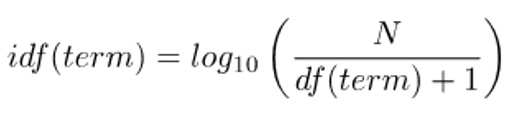

In [18]:
import math

def calculate_idfs(vocabulary, doc_features):
  doc_idfs = {}

  for term in vocabulary:

    doc_count = 0

    for doc_id in doc_features.keys():

      terms = doc_features.get(doc_id)

      if term in terms.keys():
        doc_count += 1

    doc_idfs[term] = math.log(float(len(doc_features.keys()))/float(1 + doc_count), 10)

  return doc_idfs

doc_idfs = calculate_idfs(all_terms, doc_terms)

print(len(doc_idfs))
print(doc_idfs.get("system"))

def vectorize_idf(input_terms, input_idfs, vocabulary):

  output = {}

  for item_id in input_terms.keys():

    terms = input_terms.get(item_id)
    output_vector = []

    for term in vocabulary:

      if term in terms.keys():
        output_vector.append(input_idfs.get(term)*float(terms.get(term)))
      else:
        output_vector.append(float(0))

    output[item_id] = output_vector

  return output

doc_vectors = vectorize_idf(doc_terms, doc_idfs, all_terms)

print(len(doc_vectors))
print(len(doc_vectors.get("1460")))

7775
0.4287539560862571
1460
7775


In [19]:
from operator import itemgetter

def length(vector):
  sq_length = 0
  for index in range(0, len(vector)):
    sq_length += math.pow(vector[index], 2)
  return math.sqrt(sq_length)

def dot_product(vector1, vector2):
  if len(vector1)==len(vector2):
    dot_prod = 0
    for index in range(0, len(vector1)):
      if not vector1[index]==0 and not vector2[index]==0:
        dot_prod += vector1[index]*vector2[index]
    return dot_prod
  else:
    return "Unmatching dimensionality"

def calculate_cosine(query, document):
  cosine = dot_product(query, document) / (length(query) * length(document))
  return cosine

query = qry_vectors.get("3")
results = {}

for doc_id in doc_vectors.keys():
  document = doc_vectors.get(doc_id)
  cosine = calculate_cosine(query, document)
  results[doc_id] = cosine

for items in sorted(results.items(), key=itemgetter(1), reverse=True)[:44]:
  print(items[:10])

('469', 0.3859622721607067)
('1179', 0.3699068191725209)
('1181', 0.27807446928613566)
('1142', 0.2757694552907975)
('1190', 0.24817188529858022)
('1116', 0.24315322005869805)
('445', 0.2417075890834988)
('85', 0.24078542624942006)
('599', 0.22024124644046553)
('60', 0.21799825905375303)
('540', 0.21566247151661855)
('640', 0.21024296408782855)
('372', 0.2087651537235733)
('1030', 0.2001675169823459)
('1095', 0.19552506823747554)
('965', 0.19242138560509203)
('1161', 0.19218959014357193)
('241', 0.1920836419714175)
('1191', 0.18957048812087146)
('899', 0.18867401979779222)
('137', 0.187269756980728)
('535', 0.18662176951474577)
('456', 0.18515394664134927)
('803', 0.18246287123444974)
('95', 0.18194939699167847)
('544', 0.1807489610249635)
('1077', 0.1800775358842077)
('1111', 0.17913925669881153)
('1103', 0.17724250754128612)
('837', 0.17585818390106375)
('560', 0.17248790080542448)
('1133', 0.17133891881571545)
('602', 0.16656867470647607)
('166', 0.16540198034098527)
('1080', 0.1619

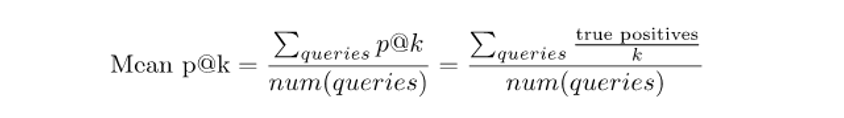

In [20]:
def calculate_precision(model_output, gold_standard):
  true_pos = 0
  for item in model_output:
    if item in gold_standard:
      true_pos += 1
  return float(true_pos)/float(len(model_output))

def calculate_found(model_output, gold_standard):
  found = 0
  for item in model_output:
    if item in gold_standard:
      found = 1
  return float(found)

precision_all = 0.0
found_all = 0.0

for query_id in mappings.keys():
  gold_standard = mappings.get(str(query_id))
  query = qry_vectors.get(str(query_id))

  results = {}
  model_output = []

  for doc_id in doc_vectors.keys():
    document = doc_vectors.get(doc_id)
    cosine = calculate_cosine(query, document)
    results[doc_id] = cosine

  for items in sorted(results.items(), key=itemgetter(1), reverse=True)[:3]:
    model_output.append(items[0])

  precision = calculate_precision(model_output, gold_standard)
  found = calculate_found(model_output, gold_standard)
  print(f"{str(query_id)}: {str(precision)}")
  precision_all += precision
  found_all += found

print(precision_all/float(len(mappings.keys())))
print(found_all/float(len(mappings.keys())))

1: 1.0
2: 0.3333333333333333
3: 1.0
4: 0.0
5: 0.0
6: 0.0
7: 0.0
8: 0.0
9: 0.3333333333333333
10: 0.6666666666666666
11: 0.3333333333333333
12: 0.0
13: 0.3333333333333333
14: 0.0
15: 0.0
16: 0.0
17: 0.0
18: 0.0
19: 0.0
20: 0.3333333333333333
21: 0.0
22: 0.0
23: 0.3333333333333333
24: 1.0
25: 0.0
26: 0.6666666666666666
27: 0.6666666666666666
28: 0.6666666666666666
29: 0.6666666666666666
30: 1.0
31: 0.3333333333333333
32: 0.3333333333333333
33: 0.0
34: 0.6666666666666666
35: 0.6666666666666666
37: 0.3333333333333333
39: 0.3333333333333333
41: 0.3333333333333333
42: 0.6666666666666666
43: 0.0
44: 0.3333333333333333
45: 0.3333333333333333
46: 0.6666666666666666
49: 0.3333333333333333
50: 0.6666666666666666
52: 1.0
54: 0.3333333333333333
55: 1.0
56: 0.6666666666666666
57: 0.0
58: 1.0
61: 0.3333333333333333
62: 1.0
65: 0.6666666666666666
66: 1.0
67: 0.0
69: 0.3333333333333333
71: 0.0
76: 1.0
79: 0.3333333333333333
81: 0.3333333333333333
82: 0.3333333333333333
84: 0.0
90: 0.0
92: 0.66666666666

In [91]:
rank_all = 0.0

for query_id in mappings.keys():
  gold_standard = mappings.get(str(query_id))
  query = qry_vectors.get(str(query_id))
  results = {}

  for doc_id in doc_vectors.keys():
    document = doc_vectors.get(doc_id)
    cosine = calculate_cosine(query, document)
    results[doc_id] = cosine

  sorted_results = sorted(results.items(), key=itemgetter(1), reverse=True)
  index = 0
  found = False

  while found==False:
    item = sorted_results[index]
    index += 1
    if index==len(sorted_results):
      found = True
    if item[0] in gold_standard:
      found = True
      print(f"{str(query_id)}: {str(float(1) / float(index))}")
      rank_all += float(1) / float(index)

print(rank_all/float(len(mappings.keys())))

1: 1.0
2: 0.3333333333333333
3: 1.0
4: 0.09090909090909091
5: 0.14285714285714285
6: 0.038461538461538464
7: 0.043478260869565216
8: 0.02857142857142857
9: 0.5
10: 1.0
11: 1.0
12: 0.1
13: 1.0
14: 0.011494252873563218
15: 0.125
16: 0.029411764705882353
17: 0.25
18: 0.25
19: 0.25
20: 0.5
21: 0.05555555555555555
22: 0.09090909090909091
23: 0.5
24: 1.0
25: 0.1111111111111111
26: 1.0
27: 1.0
28: 1.0
29: 1.0
30: 1.0
31: 0.5
32: 0.3333333333333333
33: 0.05555555555555555
34: 1.0
35: 0.5
37: 1.0
39: 1.0
41: 1.0
42: 1.0
43: 0.14285714285714285
44: 0.5
45: 1.0
46: 0.5
49: 0.3333333333333333
50: 1.0
52: 1.0
54: 0.3333333333333333
55: 1.0
56: 1.0
57: 0.09090909090909091
58: 1.0
61: 0.3333333333333333
62: 1.0
65: 1.0
66: 1.0
67: 0.25
69: 1.0
71: 0.25
76: 1.0
79: 1.0
81: 1.0
82: 0.5
84: 0.05
90: 0.2
92: 1.0
95: 0.5
96: 0.08333333333333333
97: 1.0
98: 1.0
99: 0.3333333333333333
100: 0.1
101: 0.020833333333333332
102: 1.0
104: 0.25
109: 0.5
111: 1.0
0.5804111538527951
